<a href="https://colab.research.google.com/github/AndrewHolm/descriptive-analysis/blob/main/PR1_Descriptive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
from random import randint

In [ ]:
# Dataset dictionary

file_path = "dataset_olympics.csv"
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [ ]:
df.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [ ]:
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN




---


# Preparation

Applying sampling, handling missing values, and normalization.


   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

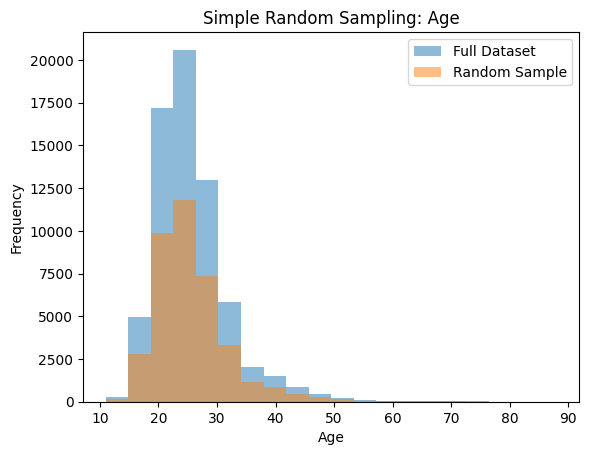

In [ ]:
# Simple random sampling

file_path = "dataset_olympics.csv"
testing_attr = 'Age'
df = pd.read_csv(file_path)
print(df.head())

sample_size = 40000

random_sample = df.sample(n=sample_size, random_state=randint(1,100))

plt.hist(df[testing_attr], bins=20, alpha=0.5, label='Full Dataset')
plt.hist(random_sample[testing_attr], bins=20, alpha=0.5, label='Random Sample')
plt.xlabel(testing_attr)
plt.ylabel('Frequency')
plt.legend()
plt.title(f'Simple Random Sampling: {testing_attr}')
plt.show()

---


# Central Tendency Measures


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import gmean, hmean

# Define the file path and column name
file_path = "dataset_olympics.csv"
testing_attr = 'Age'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Set the sample size
sample_size = 40000

# Take a random sample of the specified size
sample_data = df.sample(sample_size)

# Calculate the mean, median, mode
mean_age = sample_data[testing_attr].mean()
median_age = sample_data[testing_attr].median()
mode_age = sample_data[testing_attr].mode().values[0]

# Calculate the geometric mean
geometric_mean_age = gmean(sample_data[testing_attr])

# Calculate the harmonic mean
harmonic_mean_age = hmean(sample_data[testing_attr])

# Calculate the weighted mean (assuming you have weights in a 'Weights' column)
weights = sample_data['Weight']
weighted_mean_age = np.sum(sample_data[testing_attr] * weights) / np.sum(weights)

# Calculate the 25th, 50th (median), and 75th percentiles
percentile_25 = np.percentile(sample_data[testing_attr], 25)
percentile_50 = np.percentile(sample_data[testing_attr], 50)
percentile_75 = np.percentile(sample_data[testing_attr], 75)

# Calculate the 1st quartile (Q1) and 3rd quartile (Q3)
q1 = np.percentile(sample_data[testing_attr], 25)
q3 = np.percentile(sample_data[testing_attr], 75)

# Calculate the trimmed mean (you can specify the percentage to trim)
percentage_to_trim = 10  # Adjust this as needed
trim_value = (percentage_to_trim / 2) / 100
trimmed_data = sample_data[testing_attr].quantile([trim_value, 1 - trim_value])
trimmed_mean_age = trimmed_data.mean()

# Calculate the midrange
midrange_age = (sample_data[testing_attr].max() + sample_data[testing_attr].min()) / 2

# Print the results
print(f"Mean {testing_attr}: {mean_age}")
print(f"Median {testing_attr}: {median_age}")
print(f"Mode {testing_attr}: {mode_age}")
print(f"Geometric Mean {testing_attr}: {geometric_mean_age}")
print(f"Harmonic Mean {testing_attr}: {harmonic_mean_age}")
print(f"Weighted Mean {testing_attr}: {weighted_mean_age}")
print(f"25th Percentile {testing_attr}: {percentile_25}")
print(f"50th Percentile (Median) {testing_attr}: {percentile_50}")
print(f"75th Percentile {testing_attr}: {percentile_75}")
print(f"1st Quartile (Q1) {testing_attr}: {q1}")
print(f"3rd Quartile (Q3) {testing_attr}: {q3}")
print(f"Trimmed Mean {testing_attr} ({percentage_to_trim}% trimmed): {trimmed_mean_age}")
print(f"Midrange {testing_attr}: {midrange_age}")


Mean Age: 25.643839891804728
Median Age: 25.0
Mode Age: 23.0
Geometric Mean Age: nan
Harmonic Mean Age: nan
Weighted Mean Age: 25.195951652583826
25th Percentile Age: nan
50th Percentile (Median) Age: nan
75th Percentile Age: nan
1st Quartile (Q1) Age: nan
3rd Quartile (Q3) Age: nan
Trimmed Mean Age (10% trimmed): 28.0
Midrange Age: 49.5


Age
25.634768822933182
25.0
0    23.0
Name: Age, dtype: float64



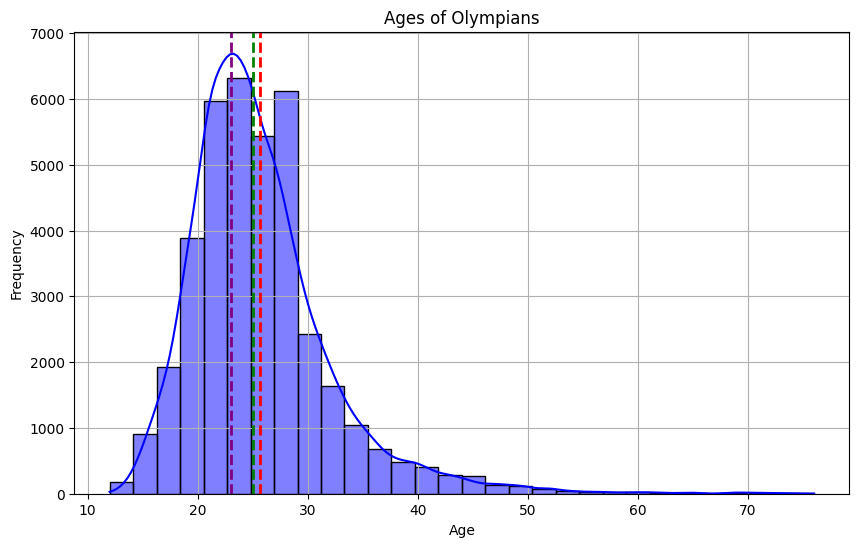

Weight
70.92878787878787
70.0
0    70.0
Name: Weight, dtype: float64



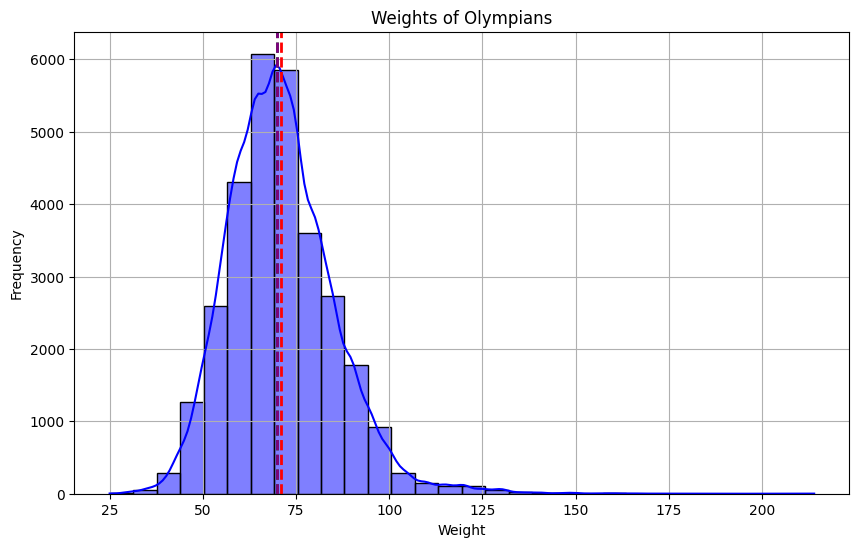

Height
175.50353132628152
175.0
0    180.0
Name: Height, dtype: float64



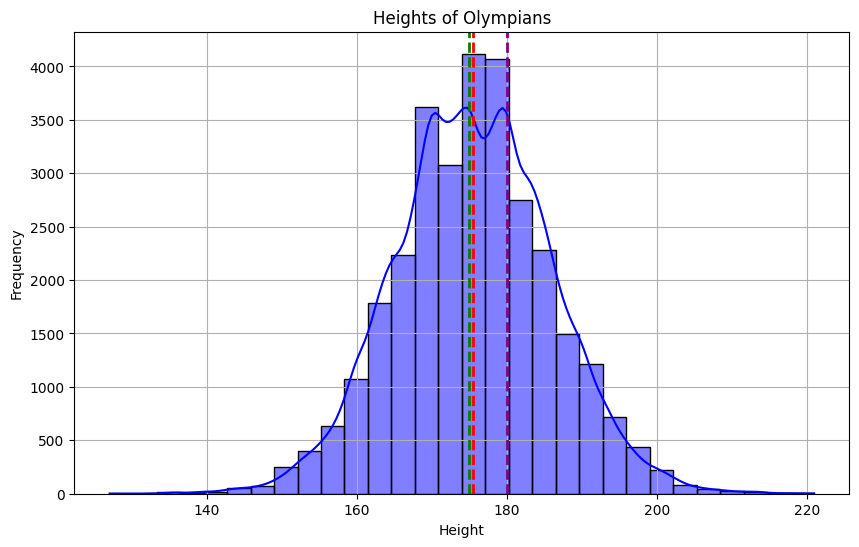

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the file path
file_path = "dataset_olympics.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Set the sample size
sample_size = 40000

# Take a random sample of the specified size
sample_data = df.sample(sample_size)

# Create a histogram of the 'Age' data
"""
  RED    -> MEAN
  GREEN  -> MEDIAN
  PURPLE -> MODE
"""

attr_names = ['Age', 'Weight', 'Height']

for attr_name in attr_names:
  plt.figure(figsize=(10, 6))
  sns.histplot(data=sample_data, x=attr_name, bins=30, color='blue', kde=True)
  plt.axvline(sample_data[attr_name].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
  plt.axvline(sample_data[attr_name].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
  plt.axvline(sample_data[attr_name].mode().values[0], color='purple', linestyle='dashed', linewidth=2, label='Mode')
  print(attr_name)
  print(sample_data[attr_name].mean())
  print(sample_data[attr_name].median())
  print(sample_data[attr_name].mode())
  print()
  plt.title(f'{attr_name}s of Olympians')
  plt.xlabel(attr_name)
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.show()


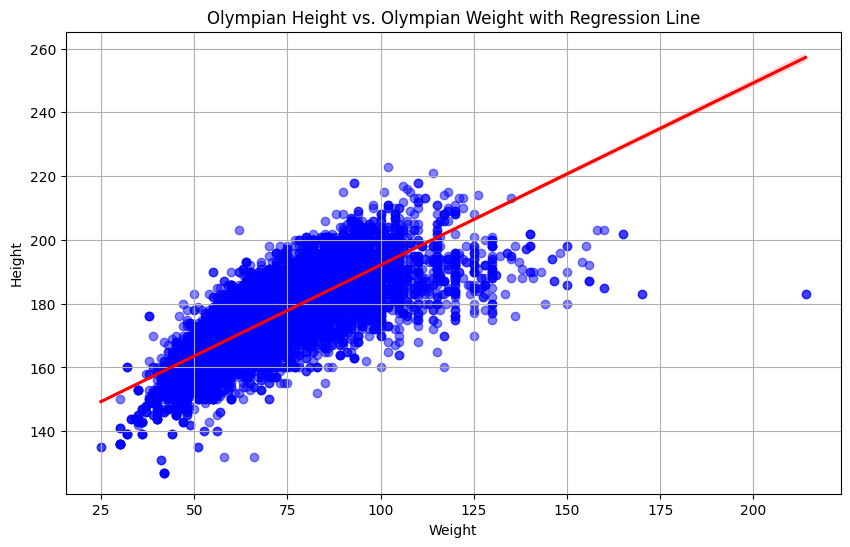

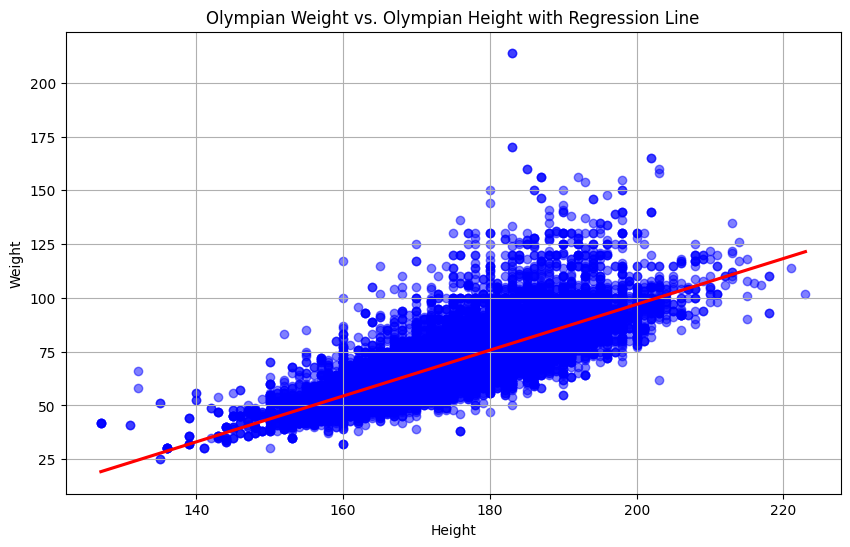

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the file path
file_path = "dataset_olympics.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Set the sample size
sample_size = 40000

# Take a random sample of the specified size
sample_data = df.sample(sample_size)

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Weight', y='Height', data=sample_data,
            scatter_kws={'alpha':0.5, 'color':'blue'}, line_kws={'color':'red'})
plt.title('Olympian Height vs. Olympian Weight with Regression Line')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Height', y='Weight', data=sample_data,
            scatter_kws={'alpha':0.5, 'color':'blue'}, line_kws={'color':'red'})
plt.title('Olympian Weight vs. Olympian Height with Regression Line')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.grid(True)
plt.show()


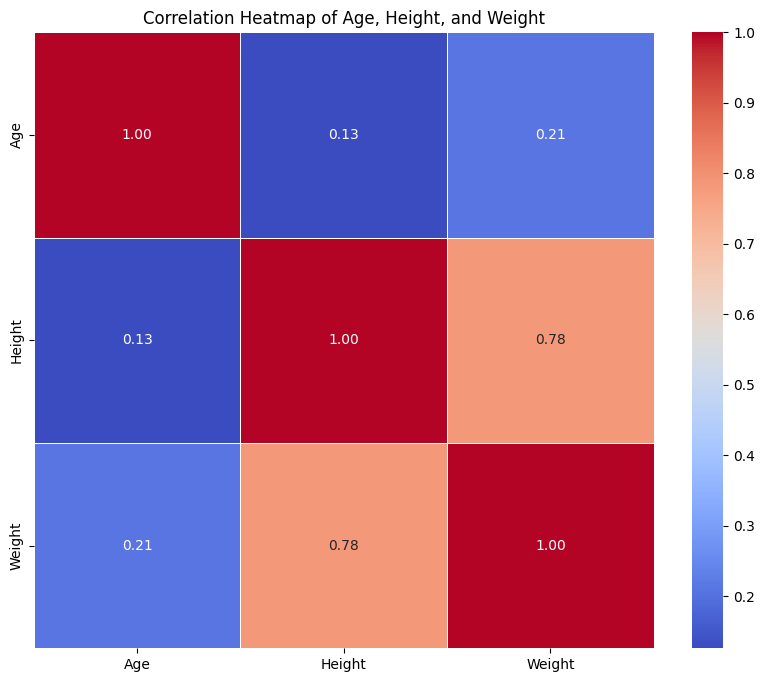

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and filter the required attributes
file_path = "dataset_olympics.csv"
df = pd.read_csv(file_path)
selected_attributes = ['Age', 'Height', 'Weight']
selected_df = df[selected_attributes]

# Create a correlation matrix
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Age, Height, and Weight')
plt.show()




---
# Dispersion Measures




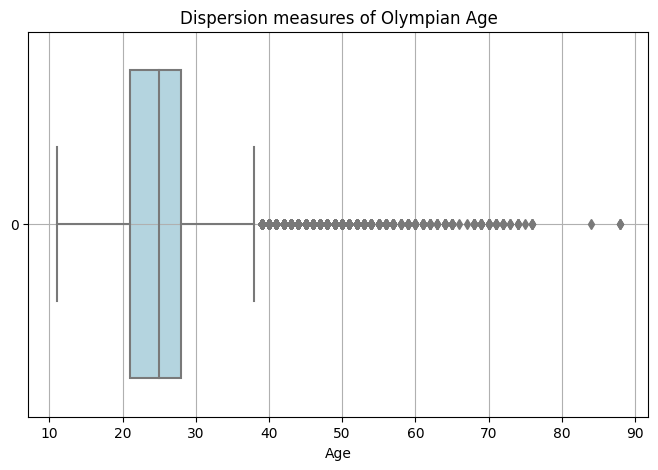

Range: 77.0
IQR: 7.0
Variance: 42.05832876799684
Standard Deviation: 6.485239299208383
Coefficient of Variation (CV): 25.29%


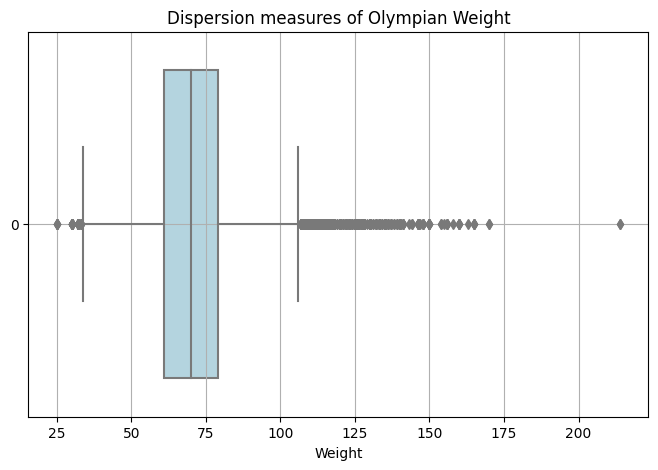

Range: 189.0
IQR: 18.0
Variance: 202.13699706749927
Standard Deviation: 14.217489126688273
Coefficient of Variation (CV): 20.05%


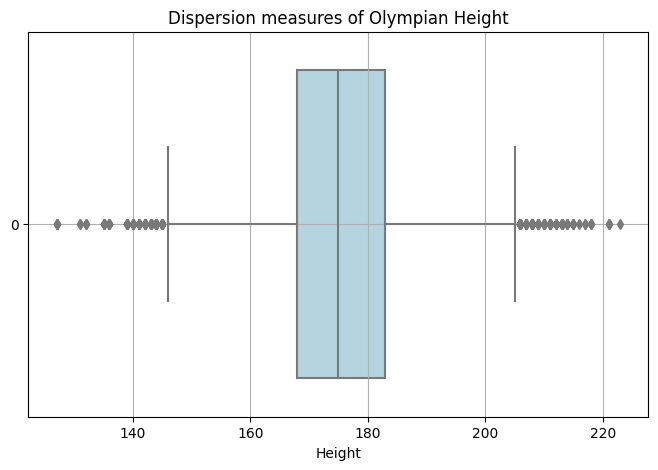

Range: 96.0
IQR: 15.0
Variance: 107.83166785235356
Standard Deviation: 10.384202802928762
Coefficient of Variation (CV): 5.92%


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the file path
file_path = "dataset_olympics.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

attr_names = ['Age', 'Weight', 'Height']

for attr_name in attr_names:
  # Select the 'Age' column from the DataFrame
  attr_data = df[attr_name]

  # Calculate and display dispersion measures
  range_value = attr_data.max() - attr_data.min()  # Range
  iqr = attr_data.quantile(0.75) - attr_data.quantile(0.25)  # Interquartile Range (IQR)
  variance = attr_data.var()  # Variance
  std_deviation = attr_data.std()  # Standard Deviation
  cv = (std_deviation / attr_data.mean()) * 100  # Coefficient of Variation (CV)

  # Create a horizontal boxplot to visualize the 'Age' data
  plt.figure(figsize=(8, 5))
  sns.boxplot(data=attr_data, orient='h', color='lightblue')
  plt.title(f'Dispersion measures of Olympian {attr_name}')
  plt.xlabel(attr_name)
  plt.grid(True)
  plt.show()

  # Display the calculated dispersion measures
  print(f"Range: {range_value}")
  print(f"IQR: {iqr}")
  print(f"Variance: {variance}")
  print(f"Standard Deviation: {std_deviation}")
  print(f"Coefficient of Variation (CV): {cv:.2f}%")




---
# Measure of Shape


In [ ]:
import pandas as pd

# Define the file path
file_path = "dataset_olympics.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Calculate skewness and kurtosis for columns A, B, and C
skewness = df.skew()
kurtosis = df.kurtosis()

print("Skewness:")
print(skewness)

print("Kurtosis:")
print(kurtosis)

<ipython-input-9-870415ae345c>:10: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


Skewness:
ID       -0.009391
Age       1.717252
Height    0.017584
Weight    0.821064
Year     -0.791266
dtype: float64
Kurtosis:
ID       -1.188978
Age       6.053829
Height    0.233221
Weight    2.326785
Year     -0.261694
dtype: float64


<ipython-input-9-870415ae345c>:11: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = df.kurtosis()




```
# This is formatted as code
```



---
# Association Measures




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Covariance between Height and Weight: 115.77257519838906
Correlation between Height and Weight: 0.7832862769107365
[[nan nan]
 [nan nan]]


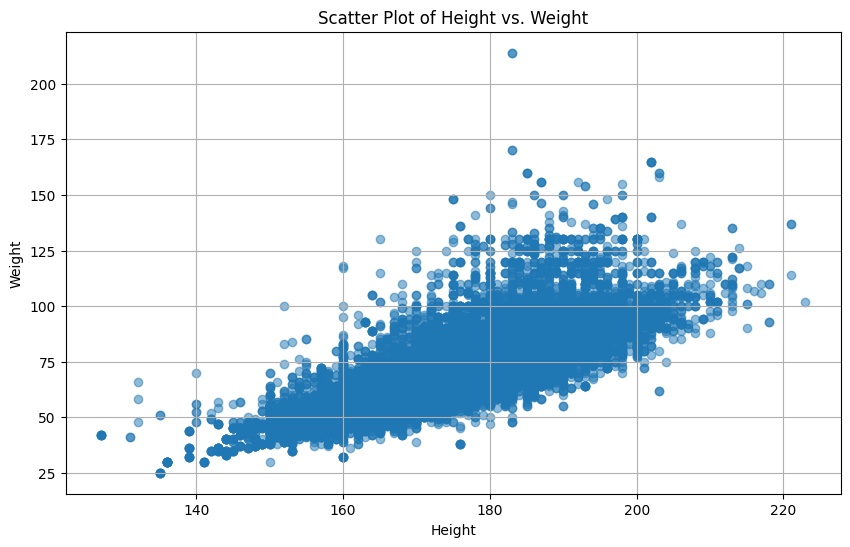

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the Olympic dataset (assuming the dataset is stored in a CSV file)
file_path = "dataset_olympics.csv"
df = pd.read_csv(file_path)

# Select the "Height" and "Weight" columns for analysis
height = df['Height']
weight = df['Weight']

# Calculate Covariance between Height and Weight
covariance = height.cov(weight)
print("Covariance between Height and Weight:", covariance)

# Calculate Correlation between Height and Weight
correlation = height.corr(weight)
print("Correlation between Height and Weight:", correlation)

print(np.cov(df['Height'], df['Weight']))

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(height, weight, alpha=0.5)
plt.title("Scatter Plot of Height vs. Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid(True)

# Annotate the plot with covariance and correlation values
plt.annotate(f'Covariance: {covariance:.2f}', xy=(0.1, 250), fontsize=12)
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.1, 230), fontsize=12)

# Show the plot
plt.show()
